In [27]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [3]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#一般來說順序是rgb但是bgr，這個函示轉換色彩空間

## 1-1. cluster with only RGB values

In [10]:
def km_clust(array, n_clusters):  #(特徵,要分幾群)
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)#開始分群
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    print(center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

In [24]:
h, w, c = img.shape#(高 寬 3表示rgb表使彩色影像)
print(img.shape)#3x3x3

Z=img.reshape((-1,3))
print(Z.shape)
print(Z)
K=2
label, center=km_clust(Z,K)#印出象數值


(1024, 1024, 3)
(1048576, 3)
[[129 175 100]
 [129 175 100]
 [129 175 100]
 ...
 [153 207 109]
 [153 207 109]
 [153 207 109]]
[[107.69216     95.56370383  71.60211064]
 [163.22613261 197.72362568 120.58351272]]


[[107  95  71]
 [163 197 120]]
[1 1 1 ... 1 1 1]


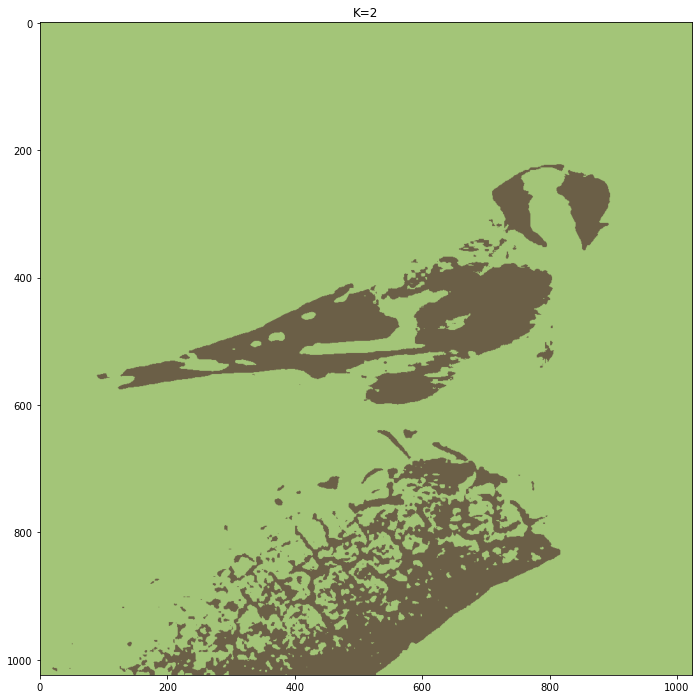

In [18]:
center=np.uint8(center)#去掉小數點 因為像素是整數
print(center)
print(label)
res=center[label.flatten()]#如果是0就要換成第一個中心點 1換成第二個 
#                           flatten使要讓變成一維 
res=res.reshape(img.shape)#把它變回原本圖片格式
#用plt顯示圖片
plt.figure(figsize=(16,12))
plt.title("K={}".format(K))
plt.imshow(res)

(1024, 1024, 3)
(1048576, 3)
[[163.22523269 197.72077299 120.58292219]
 [107.68180177  95.55200125  71.59172666]]
[[ 58.37121466  55.1944636   46.14034085]
 [160.65516225 204.76096871 114.71485459]
 [183.98443388 182.78058411 164.96642843]
 [143.94535194 128.31317092  97.22634307]]


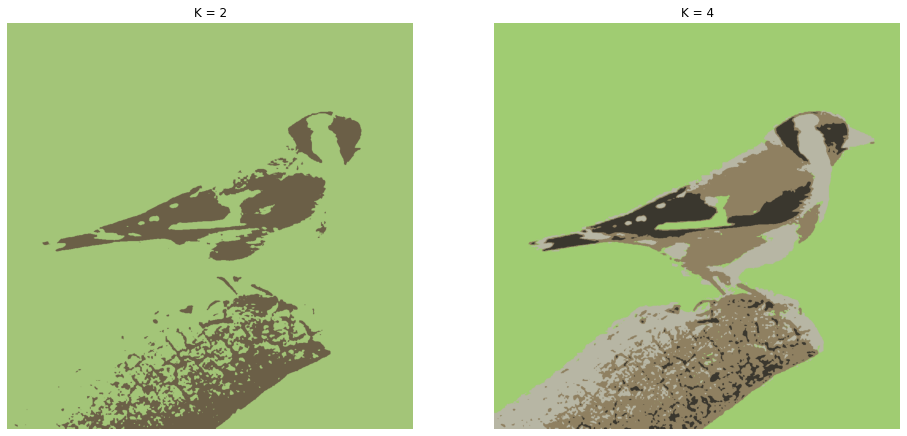

In [20]:
h, w, c = img.shape#(高 寬 3表示rgb表使彩色影像)
print(img.shape)
Z=img.reshape((-1,3))
print(Z.shape)
Ka=[2,4]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ka):
    label, center = km_clust(Z, K)#同時獨到素質和資料
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))
    plt.subplot(1, len(Ka), i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)

plt.show()

## 1-2. cluster with RGB values and the location

[[156.37255486 180.10912452 110.31741175 512.86826395 766.26185102]
 [154.5133748  186.75082077 117.16080611 510.11850354 254.2743419 ]]


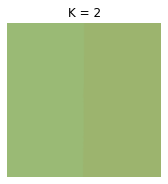

In [25]:
h, w, c = img.shape
#Added location feature

Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])#顏色碼 高 寬
                                            #把位子也加入fit考慮

Z = Z.reshape(-1, 5)

Ks = [2]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)
<b>3.考慮位置又把位置/4讓他跟象素一樣大小(正規化)(下面範例)
![](images/new.jpg)

[[153.2202621  174.66236341 108.17785044 133.24198564 187.70637658]
 [157.93186688 193.1764872  119.90789288 121.88809461  61.13273259]]
[[167.57770072 206.36756505 123.00610411 170.29540366 211.66023504]
 [166.14090919 200.18921063 129.39938786 165.88401288  51.03112725]
 [114.32044229 102.28164356  76.27168076 173.8461581  137.43258961]
 [157.87894535 192.38437665 112.37844279  45.51432853 126.55540995]]


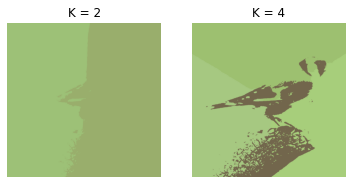

In [29]:
h, w, c = img.shape
#Added location feature

Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]])#顏色碼是255位 照片是1024 把照片除4正規畫和顏色碼相同
                                            #把位子也加入fit考慮

Z = Z.reshape(-1, 5)

Ks = [2,4]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()